### Diabetes Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
### Let us check for the class imbalance

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X = df.drop('Outcome',axis=1)
y = df["Outcome"]

In [8]:
X_sm,y_sm = smote.fit_resample(X,y)

In [9]:
df1 = pd.concat([X_sm,y_sm],axis=1)

In [10]:
df1["Outcome"].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [11]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


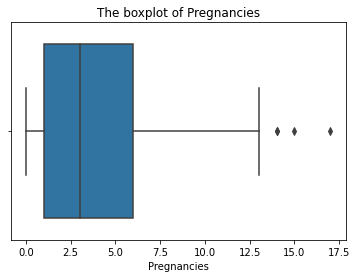

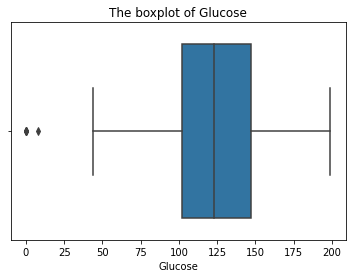

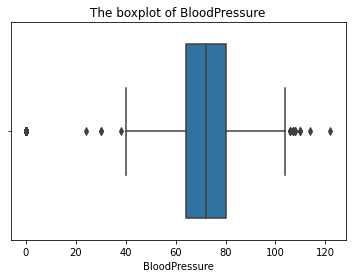

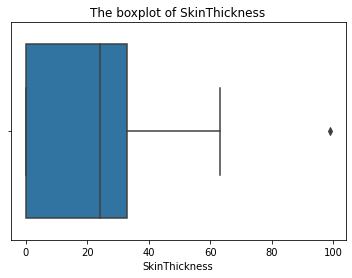

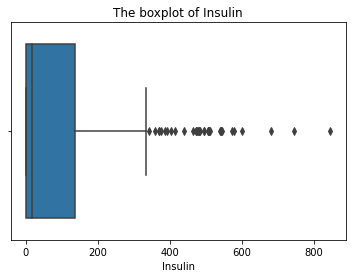

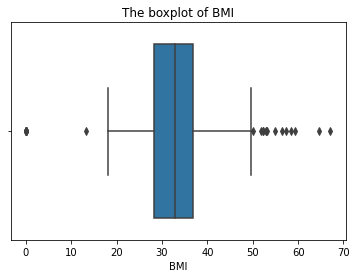

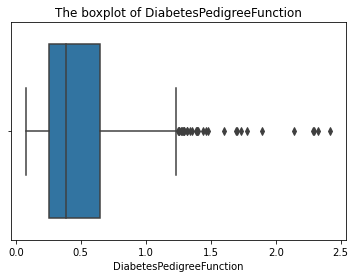

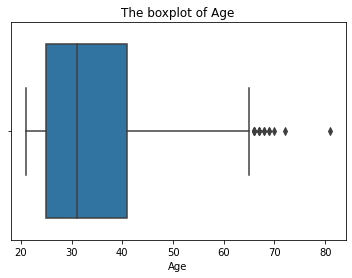

In [12]:
for feature in df1.columns:
    if feature!='Outcome':
        sns.boxplot(x=df1[feature])
        plt.title("The boxplot of {}".format(feature))
        plt.show()

In [13]:
### Let us remove the outliers

def find_iqr(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    return iqr

In [14]:
for feature in df1.columns:
    if feature!='Outcome':
        print("The interquartile range of {} is {}".format(feature,find_iqr(df1,feature)))
        find_iqr(df1,feature)

The interquartile range of Pregnancies is 5.0
The interquartile range of Glucose is 45.0
The interquartile range of BloodPressure is 16.0
The interquartile range of SkinThickness is 33.0
The interquartile range of Insulin is 136.25
The interquartile range of BMI is 8.601284581735502
The interquartile range of DiabetesPedigreeFunction is 0.39375000000000004
The interquartile range of Age is 16.0


In [15]:
def replace_outliers(df,column_name):
    iqr = find_iqr(df,column_name)
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    lower_limit = q1 - (1.5*iqr)
    upper_limit = q3 + (1.5*iqr)

    df.loc[df[column_name]>upper_limit,column_name] = df[column_name].mean()
    df.loc[df[column_name]<lower_limit,column_name] = df[column_name].mean()
    return df[column_name]

In [22]:
def new_data(df,column_name):
    df[column_name] = replace_outliers(df,column_name=column_name)
    return df[column_name]

In [23]:
for feature in df1.columns:
    if feature!='Outcome':
        df1[feature] = new_data(df1,column_name=feature)

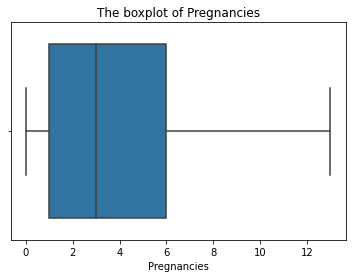

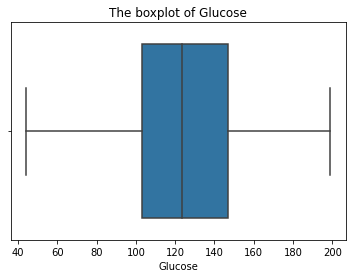

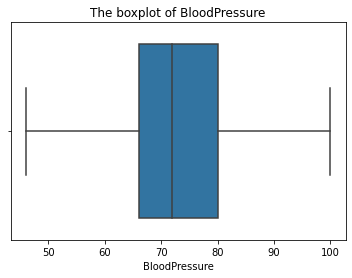

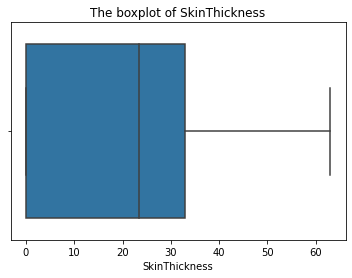

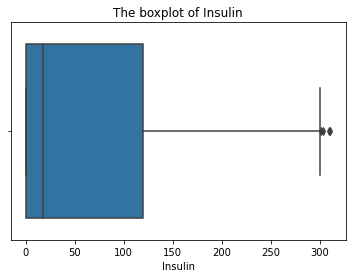

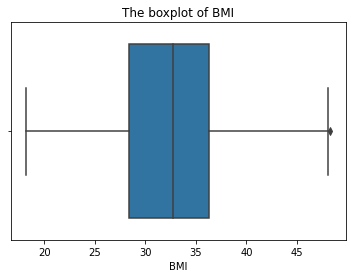

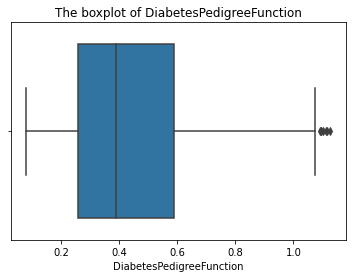

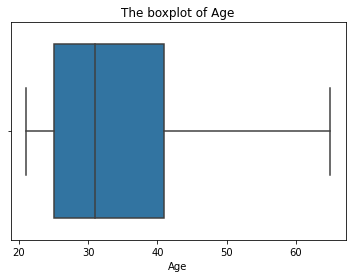

In [24]:
for feature in df1.columns:
    if feature!='Outcome':
        sns.boxplot(x=df1[feature])
        plt.title("The boxplot of {}".format(feature))
        plt.show()

Finally, we have removed outliers

In [25]:
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [35]:
model_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [36]:
Y_pred = model_rf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(Y_test,Y_pred)

0.855

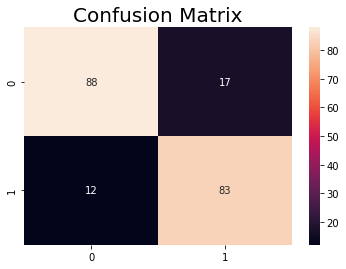

In [39]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix",fontsize=20)
plt.show()

### Saving the model

In [40]:
import pickle as pkl

pkl.dump(model_rf, open(('diabetes.pkl'),'wb'))